<a href="https://colab.research.google.com/github/NhaBaodang/KT_AI/blob/main/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU

from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split

In [ ]:
data="/content/drive/MyDrive/Face/"

In [ ]:
Data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Train = Data.flow_from_directory(data, target_size=(150,150),batch_size=32, class_mode='categorical')
Train.class_indices

Found 636 images belonging to 17 classes.


{'Anh_Viet': 0,
 'Bao_Nha': 1,
 'Chi_Nhan': 2,
 'Doan_Quang_Nhat': 3,
 'Duy_Chinh': 4,
 'Kim_Thoa': 5,
 'Le_Quang_Nhat': 6,
 'Ngoc_Quy': 7,
 'Quoc_Phong': 8,
 'Son_Lam': 9,
 'Tan_Vu': 10,
 'Thao_Hung': 11,
 'Thien_Phat': 12,
 'Toan_Quan': 13,
 'Trung_Quan': 14,
 'Tuan_Nam': 15,
 'Van_Quyet': 16}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(150,150,3))) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(17,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 128)      0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train=model.fit(Train, epochs=50, batch_size=256, verbose=1)

Epoch 1/50
20/20 [==============================] - 388s 19s/step - loss: 6.0768 - accuracy: 0.3821
Epoch 2/50
20/20 [==============================] - 67s 3s/step - loss: 0.4064 - accuracy: 0.8805
Epoch 3/50
20/20 [==============================] - 67s 3s/step - loss: 0.1260 - accuracy: 0.9701
Epoch 4/50
20/20 [==============================] - 62s 3s/step - loss: 0.1088 - accuracy: 0.9701
Epoch 5/50
20/20 [==============================] - 64s 3s/step - loss: 0.1132 - accuracy: 0.9670
Epoch 6/50
20/20 [==============================] - 66s 3s/step - loss: 0.0684 - accuracy: 0.9764
Epoch 7/50
20/20 [==============================] - 68s 3s/step - loss: 0.0501 - accuracy: 0.9874
Epoch 8/50
20/20 [==============================] - 65s 3s/step - loss: 0.0409 - accuracy: 0.9906
Epoch 9/50
20/20 [==============================] - 65s 3s/step - loss: 0.0474 - accuracy: 0.9858
Epoch 10/50
20/20 [==============================] - 66s 3s/step - loss: 0.0261 - accuracy: 0.9937
Epoch 11/50
20/20

In [ ]:
Score=model.evaluate(Train,verbose=0)
print('Hàm Mất Mát Trên Tập Kiểm Tra : ', Score[0])
print('Độ Chính Xác Trên Tập Kiểm Tra : ', Score[1])

Hàm Mất Mát Trên Tập Kiểm Tra :  0.029897179454565048
Độ Chính Xác Trên Tập Kiểm Tra :  0.9905660152435303


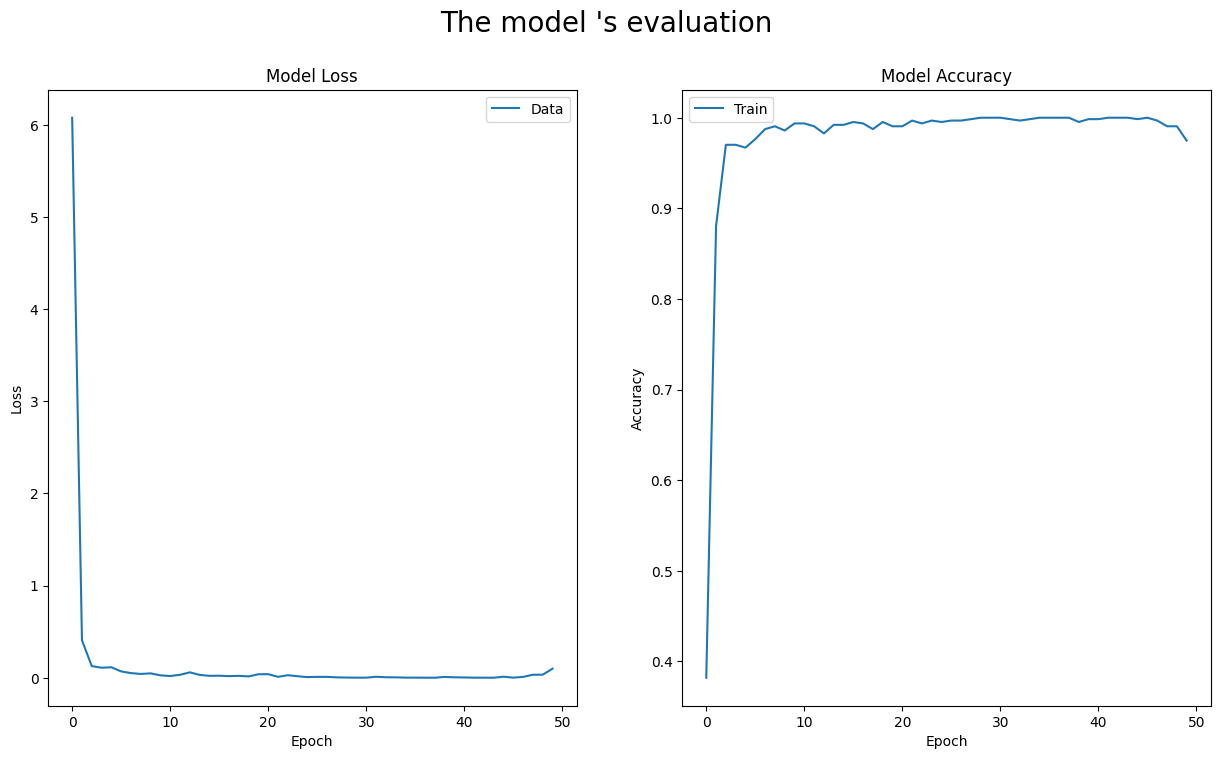

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)

axes[0].plot(train.history['loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Data'])

axes[1].plot(train.history['accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'])
plt.show()

In [ ]:
model.save('/content/drive/MyDrive/face.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model_1 = load_model('/content/drive/MyDrive/face.h5')

1/1 [==============================] - 0s 232ms/step
Đây là : Tấn Vũ


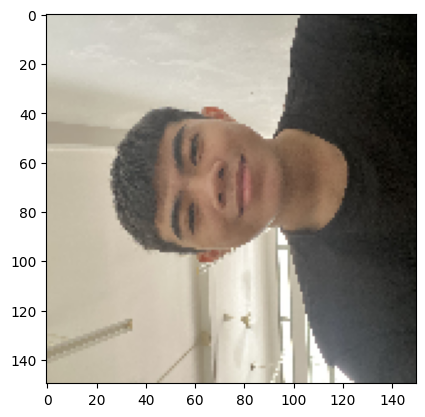

1/1 [==============================] - 0s 20ms/step
Đây là : Đoàn Quang Nhat


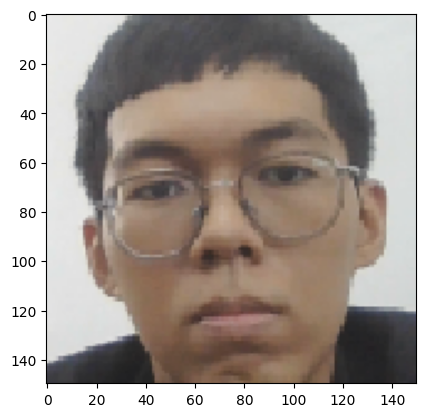

1/1 [==============================] - 0s 23ms/step
Đây là : Thảo Hưng


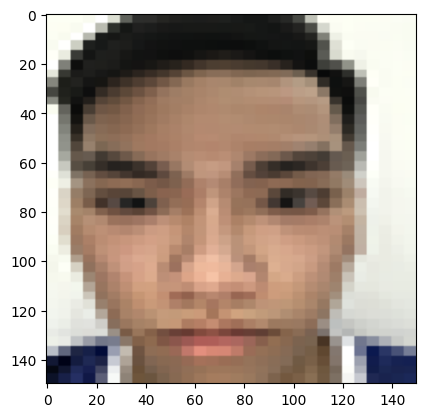

1/1 [==============================] - 0s 30ms/step
Đây là : Sơn Lâm


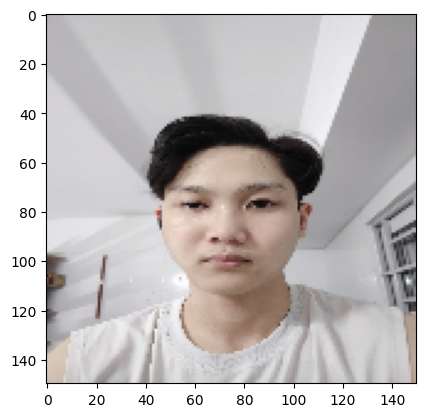

1/1 [==============================] - 0s 46ms/step
Đây là : Quốc Phong


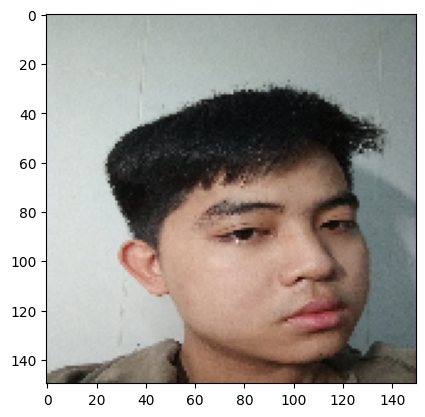

1/1 [==============================] - 0s 30ms/step
Đây là : Toàn Quân


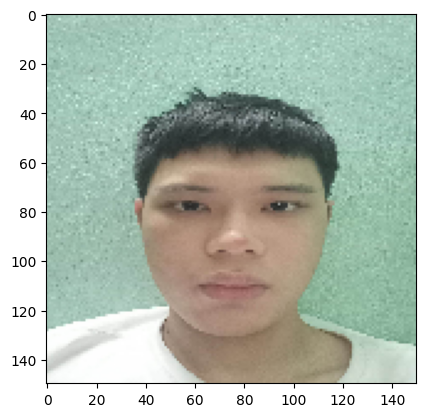

1/1 [==============================] - 0s 23ms/step
Đây là : Văn Quyết


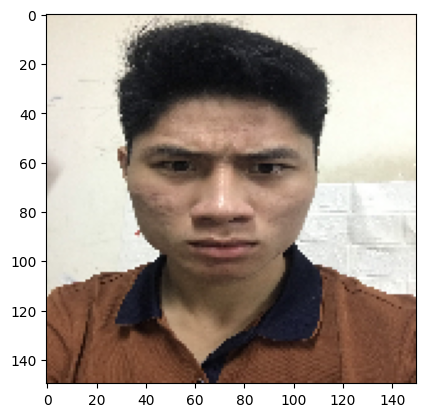

1/1 [==============================] - 0s 29ms/step
Đây là : Ngọc Quý


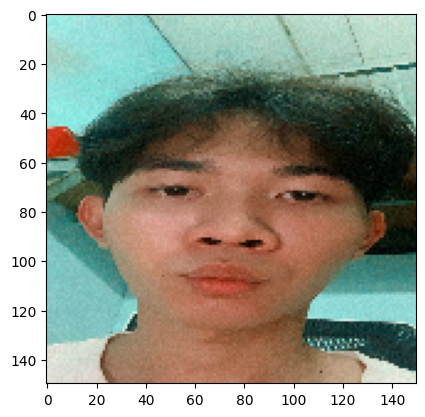

1/1 [==============================] - 0s 22ms/step
Đây là : Kim Thoa


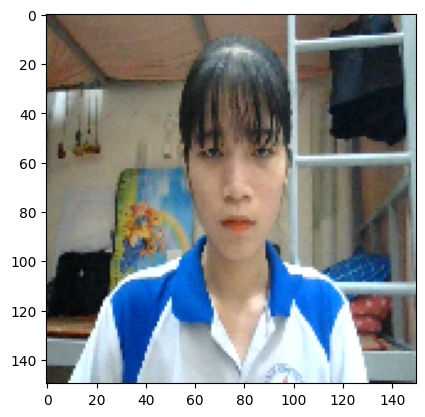

1/1 [==============================] - 0s 30ms/step
Đây là : Chí Nhân


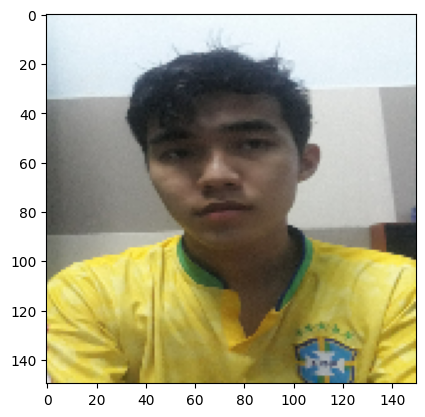

1/1 [==============================] - 0s 22ms/step
Đây là : Anh Việt


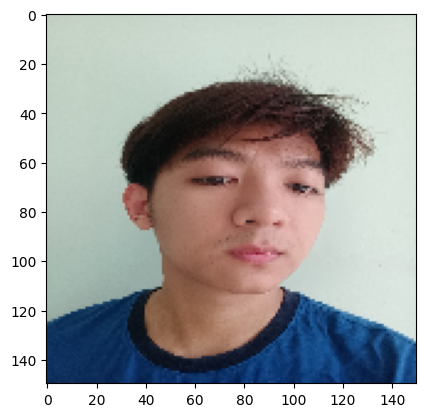

1/1 [==============================] - 0s 23ms/step
Đây là : Thiên Phát


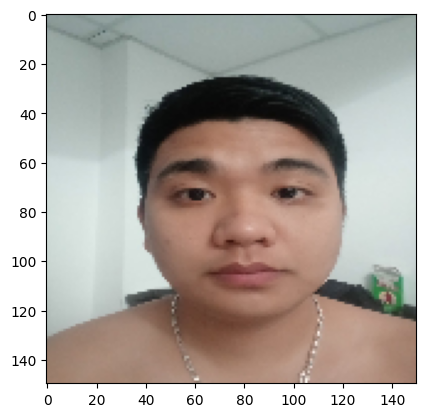

1/1 [==============================] - 0s 19ms/step
Đây là : Lê Quang Nhật


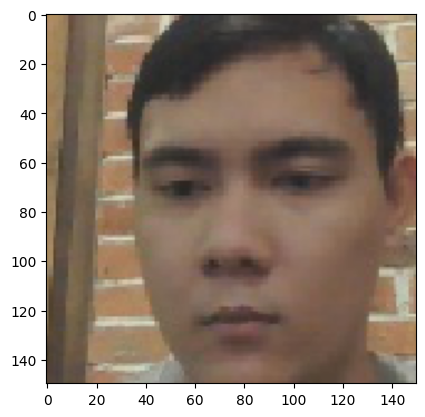

1/1 [==============================] - 0s 24ms/step
Đây là : Bảo Nha


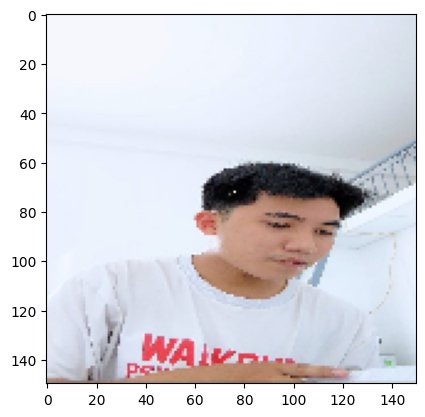

1/1 [==============================] - 0s 28ms/step
Đây là : Trung Quân


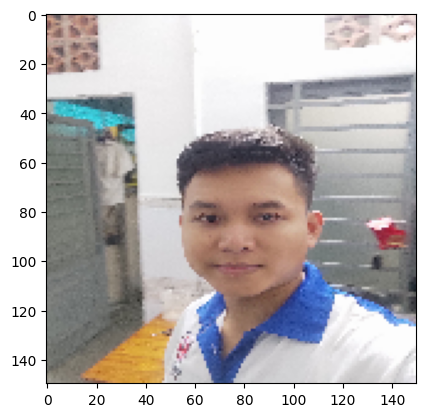

1/1 [==============================] - 0s 22ms/step
Đây là : Duy Chính


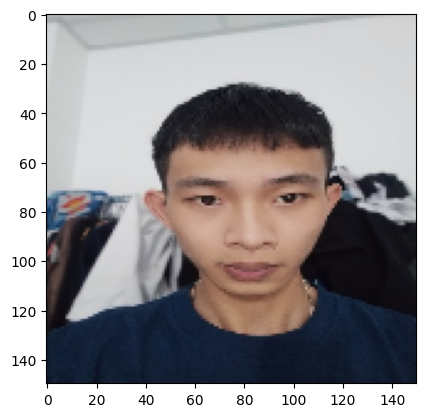

1/1 [==============================] - 0s 33ms/step
Đây là : Tuấn Nam


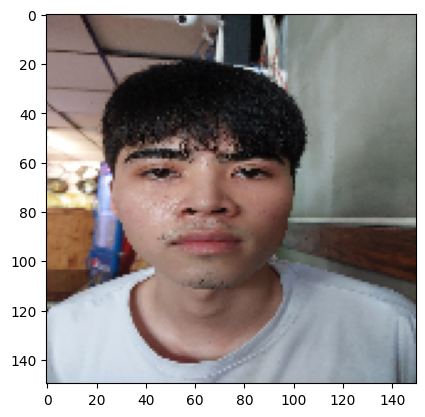

In [ ]:
folder='/content/drive/MyDrive/Test_Face/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['Anh Việt', 'Bảo Nha', 'Chí Nhân', 'Đoàn Quang Nhat', 'Duy Chính','Kim Thoa','Lê Quang Nhật','Ngọc Quý','Quốc Phong','Sơn Lâm','Tấn Vũ','Thảo Hưng','Thiên Phát','Toàn Quân','Trung Quân','Tuấn Nam','Văn Quyết']
  print('Đây là : {}'.format(class_name[result]))
  plt.show()